# Feature Selection
## Classification - Numerical Input
Diabetes data can be found [here](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv)    
Data Description: [here](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names)

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.linear_model import LogisticRegression

In [28]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
df = pd.read_csv(url, header=None)

In [29]:
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [32]:
fs = SelectKBest(score_func=f_classif, k=6)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

<BarContainer object of 8 artists>

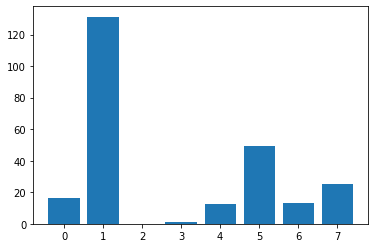

In [33]:
plt.bar([i for i, _ in enumerate(fs.scores_)], fs.scores_)

Further information on feature selection with ANOVA [here](https://towardsdatascience.com/anova-for-feature-selection-in-machine-learning-d9305e228476)

In [34]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7755905511811023

In [35]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
model.score(X_test_fs, y_test)

0.7795275590551181